In [ ]:
# # %%capture
# !pip install NeuralForecast

In [ ]:
import tensorflow as tf

2024-04-03 02:02:33.382424: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 02:02:33.662890: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 02:02:33.662964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 02:02:33.686981: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 02:02:33.768679: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ETTm2/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ETTm2/df_y.csv')

# X_df = pd.read_csv('/content/df_x.csv')
# Y_df = pd.read_csv('/content/df_y.csv')


X_df = pd.read_csv('datasets_reproducibity/ETTm2/df_x.csv')
Y_df = pd.read_csv('datasets_reproducibity/ETTm2/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...
57595,2018-02-20 22:45:00,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_df

,ds,unique_id,y
0,2016-07-01 00:00:00,OT,1.018032
1,2016-07-01 00:15:00,OT,0.980124
2,2016-07-01 00:30:00,OT,0.904223
3,2016-07-01 00:45:00,OT,0.885226
4,2016-07-01 01:00:00,OT,0.885226
...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325
57596,2018-02-20 23:00:00,OT,-1.581325
57597,2018-02-20 23:15:00,OT,-1.581325
57598,2018-02-20 23:30:00,OT,-1.562328


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## AutoImformr Horizon = 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:57504,:]
Y_test_df = Y_df.iloc[57504:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-20 00:00:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
1,2018-02-20 00:15:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
2,2018-02-20 00:30:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
3,2018-02-20 00:45:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
4,2018-02-20 01:00:00,OT,-1.277761,-0.456522,-0.333333,0.133333,-0.363014
...,...,...,...,...,...,...,...
91,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
92,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
93,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
94,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
model = Autoformer(h=96,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=100
                   )

Seed set to 1


In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='D'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts

,ds,Autoformer
unique_id,,
OT,2018-02-20 23:45:00,-1.225857
OT,2018-02-21 23:45:00,-1.229985
OT,2018-02-22 23:45:00,-1.236109
OT,2018-02-23 23:45:00,-1.222243
OT,2018-02-24 23:45:00,-1.207767
...,...,...
OT,2018-05-22 23:45:00,-1.313369
OT,2018-05-23 23:45:00,-1.313680
OT,2018-05-24 23:45:00,-1.314003


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts['Autoformer']

unique_id
OT   -1.225857
OT   -1.229985
OT   -1.236109
OT   -1.222243
OT   -1.207767
        ...   
OT   -1.313369
OT   -1.313680
OT   -1.314003
OT   -1.314334
OT   -1.330090
Name: Autoformer, Length: 96, dtype: float64

<Axes: xlabel='ds'>

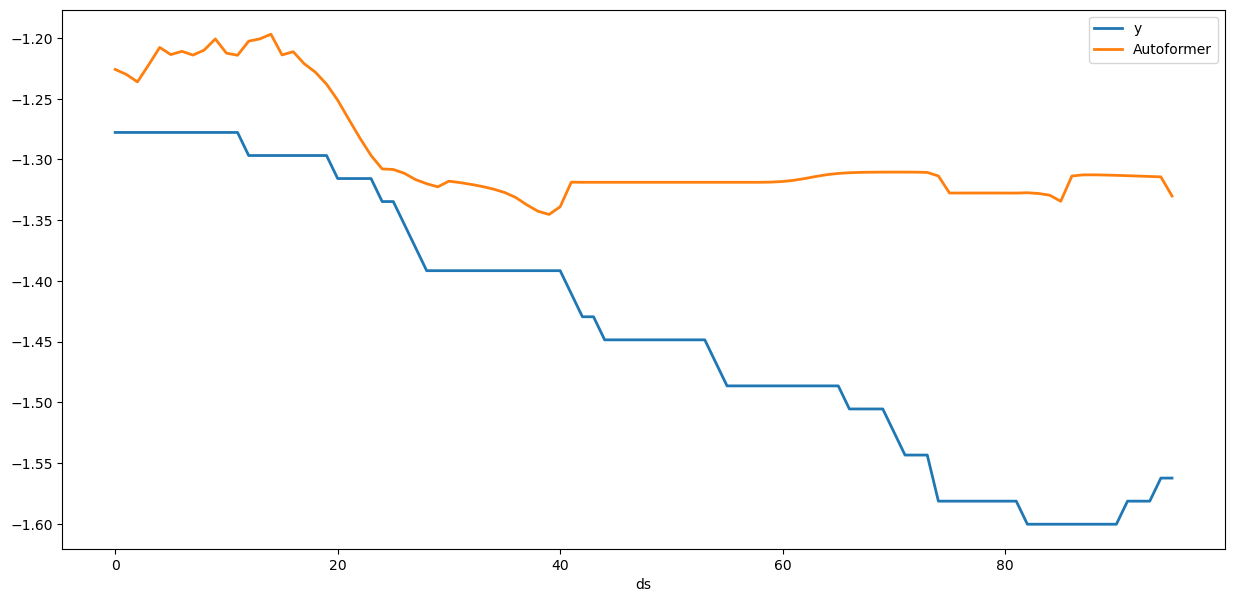

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts = forecasts.set_index('ds')
forecasts

,Autoformer
ds,
0,-1.225857
1,-1.229985
2,-1.236109
3,-1.222243
4,-1.207767
...,...
91,-1.313369
92,-1.313680
93,-1.314003


In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 0.143
Autoformer MSE: 0.027


## Horizon = 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:57408,:]
Y_test_df = Y_df.iloc[57408:,:]
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
57408,2018-02-19 00:00:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
57409,2018-02-19 00:15:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
57410,2018-02-19 00:30:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
57411,2018-02-19 00:45:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
57412,2018-02-19 01:00:00,OT,-1.429522,-0.456522,-0.500000,0.100000,-0.365753
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-19 00:00:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
1,2018-02-19 00:15:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
2,2018-02-19 00:30:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
3,2018-02-19 00:45:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
4,2018-02-19 01:00:00,OT,-1.429522,-0.456522,-0.500000,0.100000,-0.365753
...,...,...,...,...,...,...,...
187,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
188,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
189,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
190,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
model = Autoformer(h=192,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=10,

                   )

Seed set to 1


In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='D'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,-1.420913
OT,1,-1.424442
OT,2,-1.426989
OT,3,-1.431986
OT,4,-1.437968
...,...,...
OT,187,-1.411723
OT,188,-1.411086
OT,189,-1.410455


<Axes: xlabel='ds'>

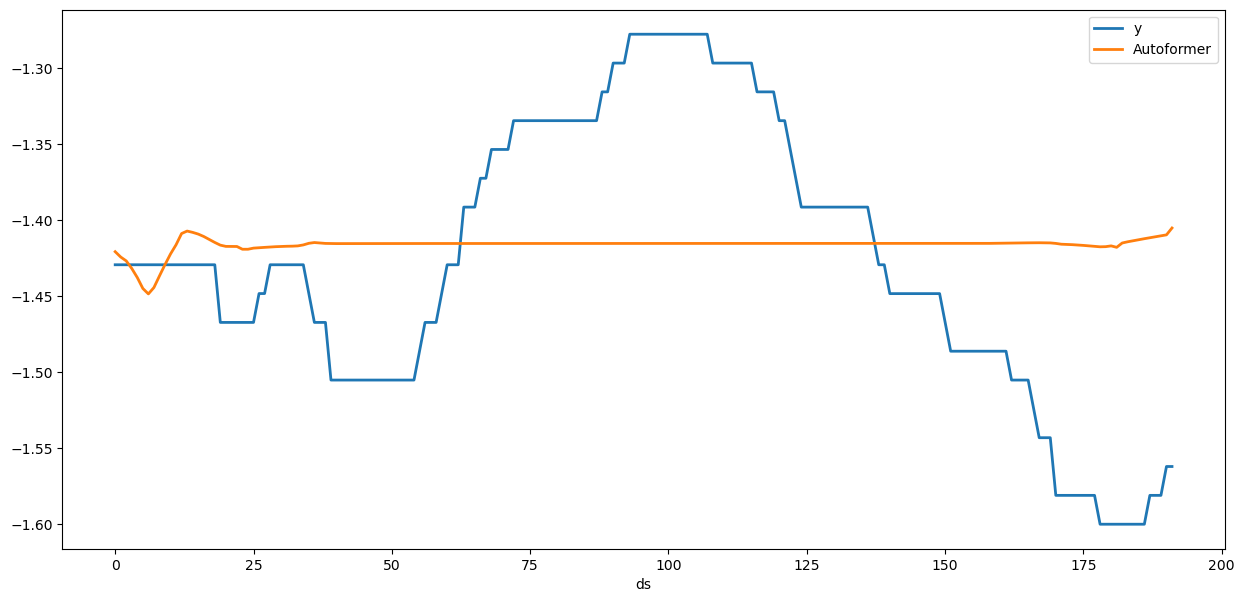

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts = forecasts.set_index('ds')
forecasts

,Autoformer
ds,
0,-1.420913
1,-1.424442
2,-1.426989
3,-1.431986
4,-1.437968
...,...
187,-1.411723
188,-1.411086
189,-1.410455


In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 0.077
Autoformer MSE: 0.009


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:57264,:]
Y_test_df = Y_df.iloc[57264:,:]
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
57264,2018-02-17 12:00:00,OT,-0.860344,0.021739,0.333333,0.033333,-0.371233
57265,2018-02-17 12:15:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
57266,2018-02-17 12:30:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
57267,2018-02-17 12:45:00,OT,-0.765445,0.021739,0.333333,0.033333,-0.371233
57268,2018-02-17 13:00:00,OT,-0.708540,0.065217,0.333333,0.033333,-0.371233
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-17 12:00:00,OT,-0.860344,0.021739,0.333333,0.033333,-0.371233
1,2018-02-17 12:15:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
2,2018-02-17 12:30:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
3,2018-02-17 12:45:00,OT,-0.765445,0.021739,0.333333,0.033333,-0.371233
4,2018-02-17 13:00:00,OT,-0.708540,0.065217,0.333333,0.033333,-0.371233
...,...,...,...,...,...,...,...
331,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
332,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
333,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
334,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
model = Autoformer(h=336,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=10,

                   )

Seed set to 1


In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='D'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

## Horizon 720

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:56880,:]
Y_test_df = Y_df.iloc[56880:,:]
Y_test_df

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
from neuralforecast.losses.numpy import mae,mse
model = Autoformer(h=192,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=100,

                   )

In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='D'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')